In [1]:
#import Data_Processor as dp
import os
import time
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import matplotlib

from nltk.stem.snowball import SnowballStemmer
import nltk
import gensim
import spacy

import matplotlib.cm as cm

stemmer = SnowballStemmer("english")
nlp = spacy.load("en_core_web_sm")

In [2]:
from tool import *
# unique(x)
# find_kol(data,rank)
# unique_time(data)
# exforeign(data)
# duplicate(data)
# remove_link(data)
# remove_sign(data)
# total_clean(indata)
# toword(data,stem=False,stop=True)
# get_words(url), pos, neg, opinion
# debug2(sentence)
# month(start,end)
# search(data,keywords)
# LDA(data, topics, words,otherwords)
# NMF(data,topics,words,otherwords)
# double(data,keyword_list)
# trend(data,hint,keyword_list)
# all_trend(metadata,hint,keyword_list)
# show(entity,month,keyword) # for all_trend
# classify(monthdata)

In [83]:
def dsearch(data,have,nhave):
    result=[]
    for i in data:
        s=0
        for j in have:
            if j in i['text'].lower():
                s=1
        for j in nhave:
            if j in i['text'].lower():
                s=0
        if s:
            result.append(i)
    return result

def lsum(l):
    if type(l[0])!=list:
        return l
    result=[]
    for i in l:
        result+=i
    return result

from wordcloud import WordCloud, STOPWORDS
def wordcloud(data,max_words=30,otherwords={},width = 500, height = 500):
    matplotlib.rcParams['figure.dpi'] = 100
    wordcloud = WordCloud(width = width, height = height, max_words=max_words,
                background_color ='white',
                stopwords = STOPWORDS.union(otherwords)).generate(' '.join([i['text'].lower() for i in data]))
    plt.axis('off')
    plt.imshow(wordcloud)

In [4]:
msdata=[]
root_path=os.getcwd()
temp=os.listdir(root_path+'\\MS_weekly')
for i in temp:
    msdata.append(total_clean(json.load(open(root_path+'\\MS_weekly\\'+i)))[:-1])
for i in msdata:
    print(len(i))
period=[]
for i in msdata:
    period+=i

4573
4964
4673
4889
4176
5006
5374
5126
3959
3996
3604
5129
4839
4095
3973
5671
4345
3860
3627
3467
3541
4300
3987
5316
3796
3263
3160
3563
3453
3429
3078
3414
3825
4729
4456
4504


In [5]:
model = gensim.models.Word2Vec.load('D')

In [6]:
for item, prob in model.wv.most_similar(['advisor',], topn=30)[:10]:
    print(item, prob)
def median(num):
    x=np.median(np.abs(np.array(num)-np.median(num)))
    return [np.median(num)-2*x for i in range(36)],[np.median(num)+2*x for i in range(36)]

adviser 0.7875774502754211
planner 0.6446051001548767
lpl 0.609402596950531
advisory 0.5822771787643433
consultant 0.5263341069221497
rias 0.5242297649383545
kestra 0.51503586769104
ria 0.49435853958129883
pwm 0.4911842942237854
highnetworth 0.47885966300964355


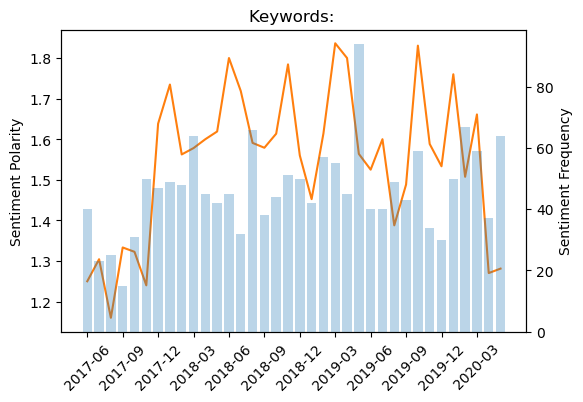

In [7]:
advisor=[dsearch(i,['advisor','financial consultant','financial planner',],['robo']) for i in msdata]
trend(advisor,0,['',])

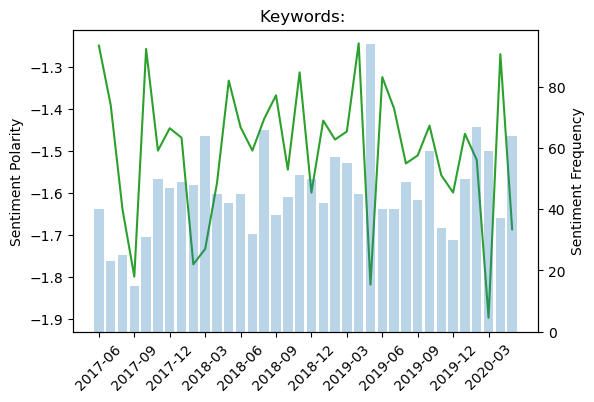

In [8]:
trend(advisor,1,['',])

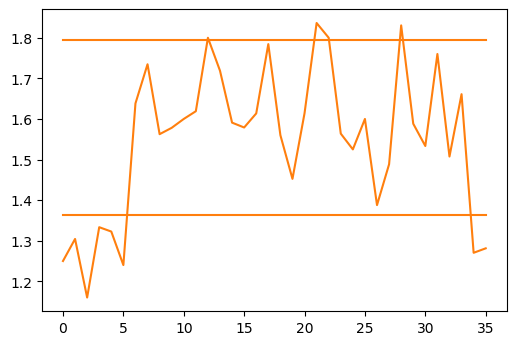

In [9]:
plt.plot(subanalyze(advisor,[''])[0],color='C1')
plt.plot(median(subanalyze(advisor,[''])[0])[0],color='C1')
plt.plot(median(subanalyze(advisor,[''])[0])[1],color='C1')
plt.show()

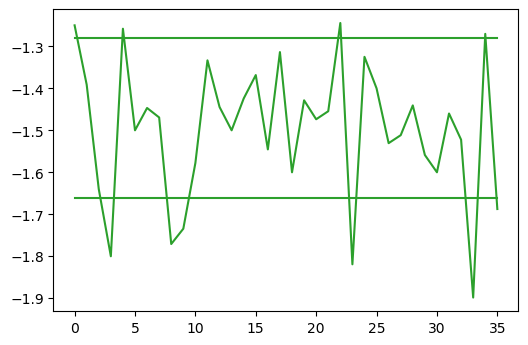

In [10]:
plt.plot(subanalyze(advisor,[''])[1],color='C2')
plt.plot(median(subanalyze(advisor,[''])[1])[0],color='C2')
plt.plot(median(subanalyze(advisor,[''])[1])[1],color='C2')
plt.show()

#### 0\~5 2017-06\~2017-11 (protocol)

In [11]:
unique([(i['positive'],i['negative']) for i in advisor[6]])

[((1, -1), 20, 42.55),
 ((2, -1), 7, 14.89),
 ((3, -1), 5, 10.64),
 ((1, -2), 4, 8.51),
 ((2, -2), 4, 8.51),
 ((4, -2), 2, 4.26),
 ((1, -3), 2, 4.26),
 ((2, -4), 1, 2.13),
 ((3, -2), 1, 2.13),
 ((1, -4), 1, 2.13)]

In [12]:
unique([(i['positive'],i['negative']) for i in lsum(advisor[:6])])

[((1, -1), 92, 50.0),
 ((1, -2), 45, 24.46),
 ((2, -1), 21, 11.41),
 ((1, -3), 9, 4.89),
 ((3, -1), 6, 3.26),
 ((3, -2), 3, 1.63),
 ((2, -2), 3, 1.63),
 ((1, -4), 2, 1.09),
 ((3, -3), 1, 0.54),
 ((2, -3), 1, 0.54),
 ((4, -2), 1, 0.54)]

In [13]:
LDA([i for i in lsum(advisor[:6]) if i['positive']==1 and i['negative']==-2],5,7,{'morgan','stanley','morganstanley','advisor','financial'})

['0.027*"u" + 0.020*"k" + 0.014*"stanley" + 0.014*"cyborg" + 0.014*"ability" + 0.014*"bday" + 0.014*"suggest"',
 '0.029*"advisor" + 0.023*"advisory" + 0.023*"firm" + 0.012*"client" + 0.012*"join" + 0.012*"share" + 0.012*"glazer"',
 '0.032*"broker" + 0.025*"protocol" + 0.017*"advisor" + 0.017*"employment" + 0.017*"alan" + 0.017*"contract" + 0.017*"check"',
 '0.026*"broker" + 0.020*"get" + 0.014*"via" + 0.014*"stanley" + 0.014*"money" + 0.014*"core" + 0.014*"major"',
 '0.033*"advisor" + 0.028*"exit" + 0.028*"say" + 0.023*"protocol" + 0.023*"elzweig" + 0.017*"sign" + 0.017*"posted"']

In [14]:
text(search([i for i in lsum(advisor[:6]) if i['positive']==1 and i['negative']==-2],['']))

45


['A Financial Advisor from Morgan Stanley wanted to connect with me on LinkedIn Dont you people know I let LaptopShopWH handle my money',
 'Advisors are not marketers How Prudential Morgan Stanley solve this challenge HearsaySystems ',
 'And as expected its gameon in a post era Morgan Stanley obtains Temporary Restraining Order TRO against departing broker who tried to contact former clients to join him at the new firm Morgan Stanley claims client list is THEIR data not advisors ',
 'Andy Chase Morgan Stanley private wealth financial advisor discusses the markets outlook ahead of',
 'As Morgan Stanley exits the Broker Protocol Alan Foxman reminds advisors to check their employment contracts',
 'As Morgan Stanley exits the Broker Protocol Alan Foxman reminds advisors to check their employment contracts ',
 'BD Advisor Valuations To Compress As Morgan Stanley Withdrawal Unravels The Broker Protocol other Weekend Reading for Financial Planners Nov ',
 'BIOCON OPENS MORGAN STANLEY is Overw

#### 8 2018-02

In [15]:
unique([(i['positive'],i['negative']) for i in advisor[7]])

[((1, -1), 14, 28.57),
 ((1, -2), 9, 18.37),
 ((2, -1), 8, 16.33),
 ((2, -2), 7, 14.29),
 ((3, -1), 5, 10.2),
 ((3, -2), 5, 10.2),
 ((2, -3), 1, 2.04)]

In [16]:
unique([(i['positive'],i['negative']) for i in lsum(advisor[8:10])])

[((1, -1), 33, 29.46),
 ((1, -2), 19, 16.96),
 ((3, -1), 13, 11.61),
 ((2, -1), 12, 10.71),
 ((2, -2), 10, 8.93),
 ((1, -3), 9, 8.04),
 ((1, -4), 8, 7.14),
 ((3, -2), 3, 2.68),
 ((3, -4), 2, 1.79),
 ((2, -3), 1, 0.89),
 ((4, -1), 1, 0.89),
 ((3, -3), 1, 0.89)]

In [17]:
text([i for i in lsum(advisor[8:10]) if i['negative']<-2])

21


[' knew of star bankerfinancial advisor alleged reported violence and abuse of exwives and girlfriends Bank managers were told but he kept his job He still works there via nytimes ',
 ' loses arbitration bid in lawsuit by fired advisor ',
 'Advisor on Active Military Duty Fights Morgan Stanley Over Arb Case via ThinkAdvisor',
 'Advisor on Active Military Duty Fights Morgan Stanley Over Arb CaseLt Cmdr Harvey R Klyce lost a falseinducement case against Morgan Stanley The SEC is his last hope he tells ThinkAdvisor ',
 'After Morgan Stanley and UBS exited the Broker Protocol their attempts to browbeat advisors have largely failed executive recruiter Mark Elzweig writes ',
 'ExMorgan Stanley Advisor Ami Forte Has a New Job After ScandalThe former Morgan Stanley advisor fired after a million ruling is now part of Pinnacle Investments ',
 'Financial Advisor IQ Morgan Stanley Suffers TRO Defeat ',
 'Fired Morgan Stanley Broker Says Firm Destroyed EvidenceTodd Walker says a FINRA arb panel fai

#### 23 (college scandal)

In [18]:
unique([(i['positive'],i['negative']) for i in advisor[22]])

[((1, -1), 16, 35.56),
 ((2, -1), 10, 22.22),
 ((3, -1), 9, 20.0),
 ((1, -2), 4, 8.89),
 ((2, -2), 3, 6.67),
 ((4, -2), 1, 2.22),
 ((3, -2), 1, 2.22),
 ((1, -3), 1, 2.22)]

In [19]:
unique([(i['positive'],i['negative']) for i in advisor[23]])

[((1, -1), 23, 24.47),
 ((1, -3), 20, 21.28),
 ((1, -2), 13, 13.83),
 ((2, -1), 12, 12.77),
 ((3, -1), 11, 11.7),
 ((2, -2), 5, 5.32),
 ((2, -3), 4, 4.26),
 ((3, -2), 2, 2.13),
 ((1, -4), 1, 1.06),
 ((2, -4), 1, 1.06),
 ((4, -1), 1, 1.06),
 ((3, -4), 1, 1.06)]

In [20]:
text([i for i in advisor[23] if i['negative']<-2])

27


['A successful team had a vision of how to serve their clients which became increasingly difficult to deliver on from within their brokerage firm Former Morgan Stanley advisor Margaret Dechant shares her breakaway story podcast meridian Pershing',
 'Brazilian state lender Caixa Economica Federal has picked investment bank Morgan Stanley as coadvisor to help it find insurance partners a source with knowledge of the matter said ',
 'Brazils Caixa picks Morgan Stanley as coadvisor on insurance deals source RT',
 'Dems wont beat Trump unless economy seriously recedes as per Morgan Stanley recent article by a top economic advisor of theres Incumbent strong economy hard to defeat',
 'Former Morgan Stanley advisor Margaret Dechant had what she described as a selfsufficient business at Morgan Stanley So what drove her partners to leave deferred comp behind to form their own firm meridian Listen in',
 'Grateful to be named on Barrons Top Financial Advisors for Also recognizing all the Morgan St

#### 33

In [21]:
unique([(i['positive'],i['negative']) for i in advisor[32]])

[((1, -1), 24, 35.82),
 ((2, -1), 15, 22.39),
 ((1, -2), 11, 16.42),
 ((3, -1), 5, 7.46),
 ((2, -3), 3, 4.48),
 ((1, -3), 3, 4.48),
 ((2, -2), 2, 2.99),
 ((3, -2), 1, 1.49),
 ((1, -5), 1, 1.49),
 ((1, -4), 1, 1.49),
 ((3, -3), 1, 1.49)]

In [22]:
unique([(i['positive'],i['negative']) for i in advisor[33]])

[((1, -1), 18, 30.51),
 ((2, -1), 9, 15.25),
 ((1, -2), 8, 13.56),
 ((2, -4), 7, 11.86),
 ((3, -2), 4, 6.78),
 ((3, -1), 3, 5.08),
 ((2, -3), 3, 5.08),
 ((2, -2), 2, 3.39),
 ((1, -3), 2, 3.39),
 ((3, -3), 1, 1.69),
 ((1, -4), 1, 1.69),
 ((3, -4), 1, 1.69)]

In [23]:
text([i for i in advisor[33] if i['negative']==-4])

9


['I was a financial advisor for Morgan Stanley ten years ago at the beginning of the Great Recession People suffered Now there seems to be a billionaire on every corner Where did the wealth come from',
 'Mahmoud ElAwadi former VP Snr Financial AdvisorPortfolio Manager at Merrill Lynch and former VP Resident Manager F A at Morgan Stanley reveals something very shocking about China and the corona virus Well worth watching The truth that no one is talking about ',
 'Mahmoud ElAwadi former Vice PresidentSenior Financial Advisor at Merrill Lynch and former Vice President at Morgan Stanley reveals something very shocking about China and the corona virus Well worth watching The truth that no one is talking about ',
 'Stocks suffer worst day since October crash waiting for policy response from Washington to address coronavirus pandemic maxmyinterest MorganStanley RBAdvisors JeffreyKleintop CharlesSchwab agaryshilling ',
 'THIS IS AN EYE OPENER Mahmoud ElAwadi Former Vice PresidentSenior Financ

# Trend

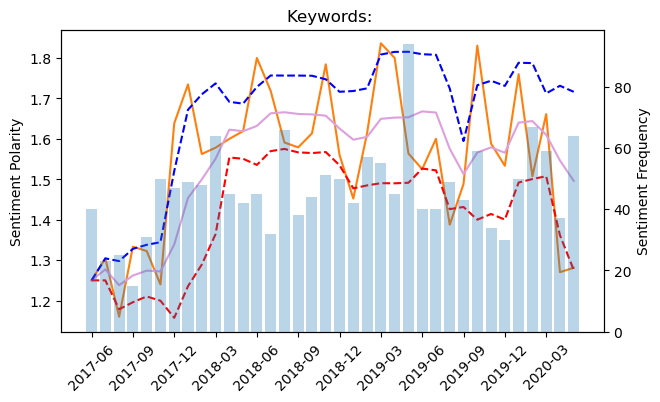

In [24]:
ma(advisor,[''],0,ma=5)

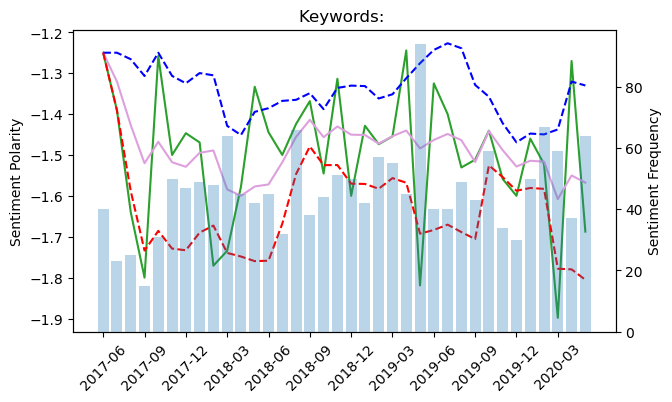

In [25]:
ma(advisor,[''],1,ma=5)

#### increasing

In [26]:
unique([(i['positive'],i['negative']) for i in advisor[5]])

[((1, -1), 21, 42.0),
 ((1, -2), 18, 36.0),
 ((2, -1), 6, 12.0),
 ((1, -3), 2, 4.0),
 ((4, -2), 1, 2.0),
 ((2, -2), 1, 2.0),
 ((3, -2), 1, 2.0)]

In [27]:
unique([(i['positive'],i['negative']) for i in advisor[6]])

[((1, -1), 20, 42.55),
 ((2, -1), 7, 14.89),
 ((3, -1), 5, 10.64),
 ((1, -2), 4, 8.51),
 ((2, -2), 4, 8.51),
 ((4, -2), 2, 4.26),
 ((1, -3), 2, 4.26),
 ((2, -4), 1, 2.13),
 ((3, -2), 1, 2.13),
 ((1, -4), 1, 2.13)]

In [28]:
text([i for i in advisor[5] if i['negative']==-2 and i['positive']==1])

18


['And as expected its gameon in a post era Morgan Stanley obtains Temporary Restraining Order TRO against departing broker who tried to contact former clients to join him at the new firm Morgan Stanley claims client list is THEIR data not advisors ',
 'As Morgan Stanley exits the Broker Protocol Alan Foxman reminds advisors to check their employment contracts',
 'As Morgan Stanley exits the Broker Protocol Alan Foxman reminds advisors to check their employment contracts ',
 'BD Advisor Valuations To Compress As Morgan Stanley Withdrawal Unravels The Broker Protocol other Weekend Reading for Financial Planners Nov ',
 'Barrons Health and Wealth Roundtable Four top advisors offer strategies for avoiding common pitfalls when planning for your postcareer years MorganStanley RBC HighTowerAdvsor',
 'Dollar Advisory Financial Services Sun Pharma Plunges On Weak Q Nos Morgan Stanley Underweight ',
 'Eric ApplewhiteMorgan Stanley our ability to be tactical as wealth managers gives us the abilit

In [29]:
text([i for i in advisor[6] if i['negative']==-1 and i['positive']==3])

5


['Adam you are the GREATEST for retweeting this Please let me know when I can help you with your mission of making everybody more savvy about money PS Look a Morgan Stanley advisor bought copies of my book for clients ',
 'I have my financial advisor is Justin Prettiger from Morgan Stanley in El Paso Hes great',
 'Rothschild Global Advisory appoints former Morgan Stanley exec as Greater China head ',
 'So who bought copies of my book at a meeting in on Tuesday MorganStanley advisor Alix Magner Gotta love a who intentionally strategizes on how to get your kids through ',
 'Stop picking stocks having only male advisors etc Evolve your firm to reflect a greatly enhanced Client Experience anchored by holistic financial advice provided by diverse advisors So says Greg Fleming former President of Morgan Stanley at ']

# Service models

In [30]:
def read_data(path):
    structure=list(os.walk(path))
    summary=[]
    for i in structure:
        if not i[1]:
            temp=[]
            for j in i[2]:
                #print(i[0]+'\\'+j)
                #temp.append([(x['text'],x['positive'],x['negative']) for x in anothertemp])
                temp.append([{'text':x['text'],'positive':x['positive'],'negative':x['negative']} for x in remove_rubbish(json.load(open(i[0]+'\\'+j))[:-1])])
            summary.append(temp)
    #return summary
    def lsum(list_):
        result=[]
        num=len(list_[0])
        for i in range(num):
            temp=[]
            for j in list_:
                temp+=j[i]
            result.append(temp)
        return result
    return lsum(summary)

In [31]:
m=month('2017-06','2020-05')
root_path=os.getcwd()
category=os.listdir(root_path+'\\SentiStrength\\final')
metadata=[]
for i in category:
    metadata.append([])
    metadata[-1]=read_data(root_path+'\\SentiStrength\\final\\'+i)

In [32]:
metaadvisor=[[dsearch(j,['advisor','financial consultant','financial planner',],['robo','wealthfront']) for j in i] for i in metadata]
del metadata

In [33]:
category

['Bank Brokerage', 'Discount Brokerage', 'Full Brokerage', 'Robo Advisor']

In [34]:
# 1,5 Sean Hannity's child molester

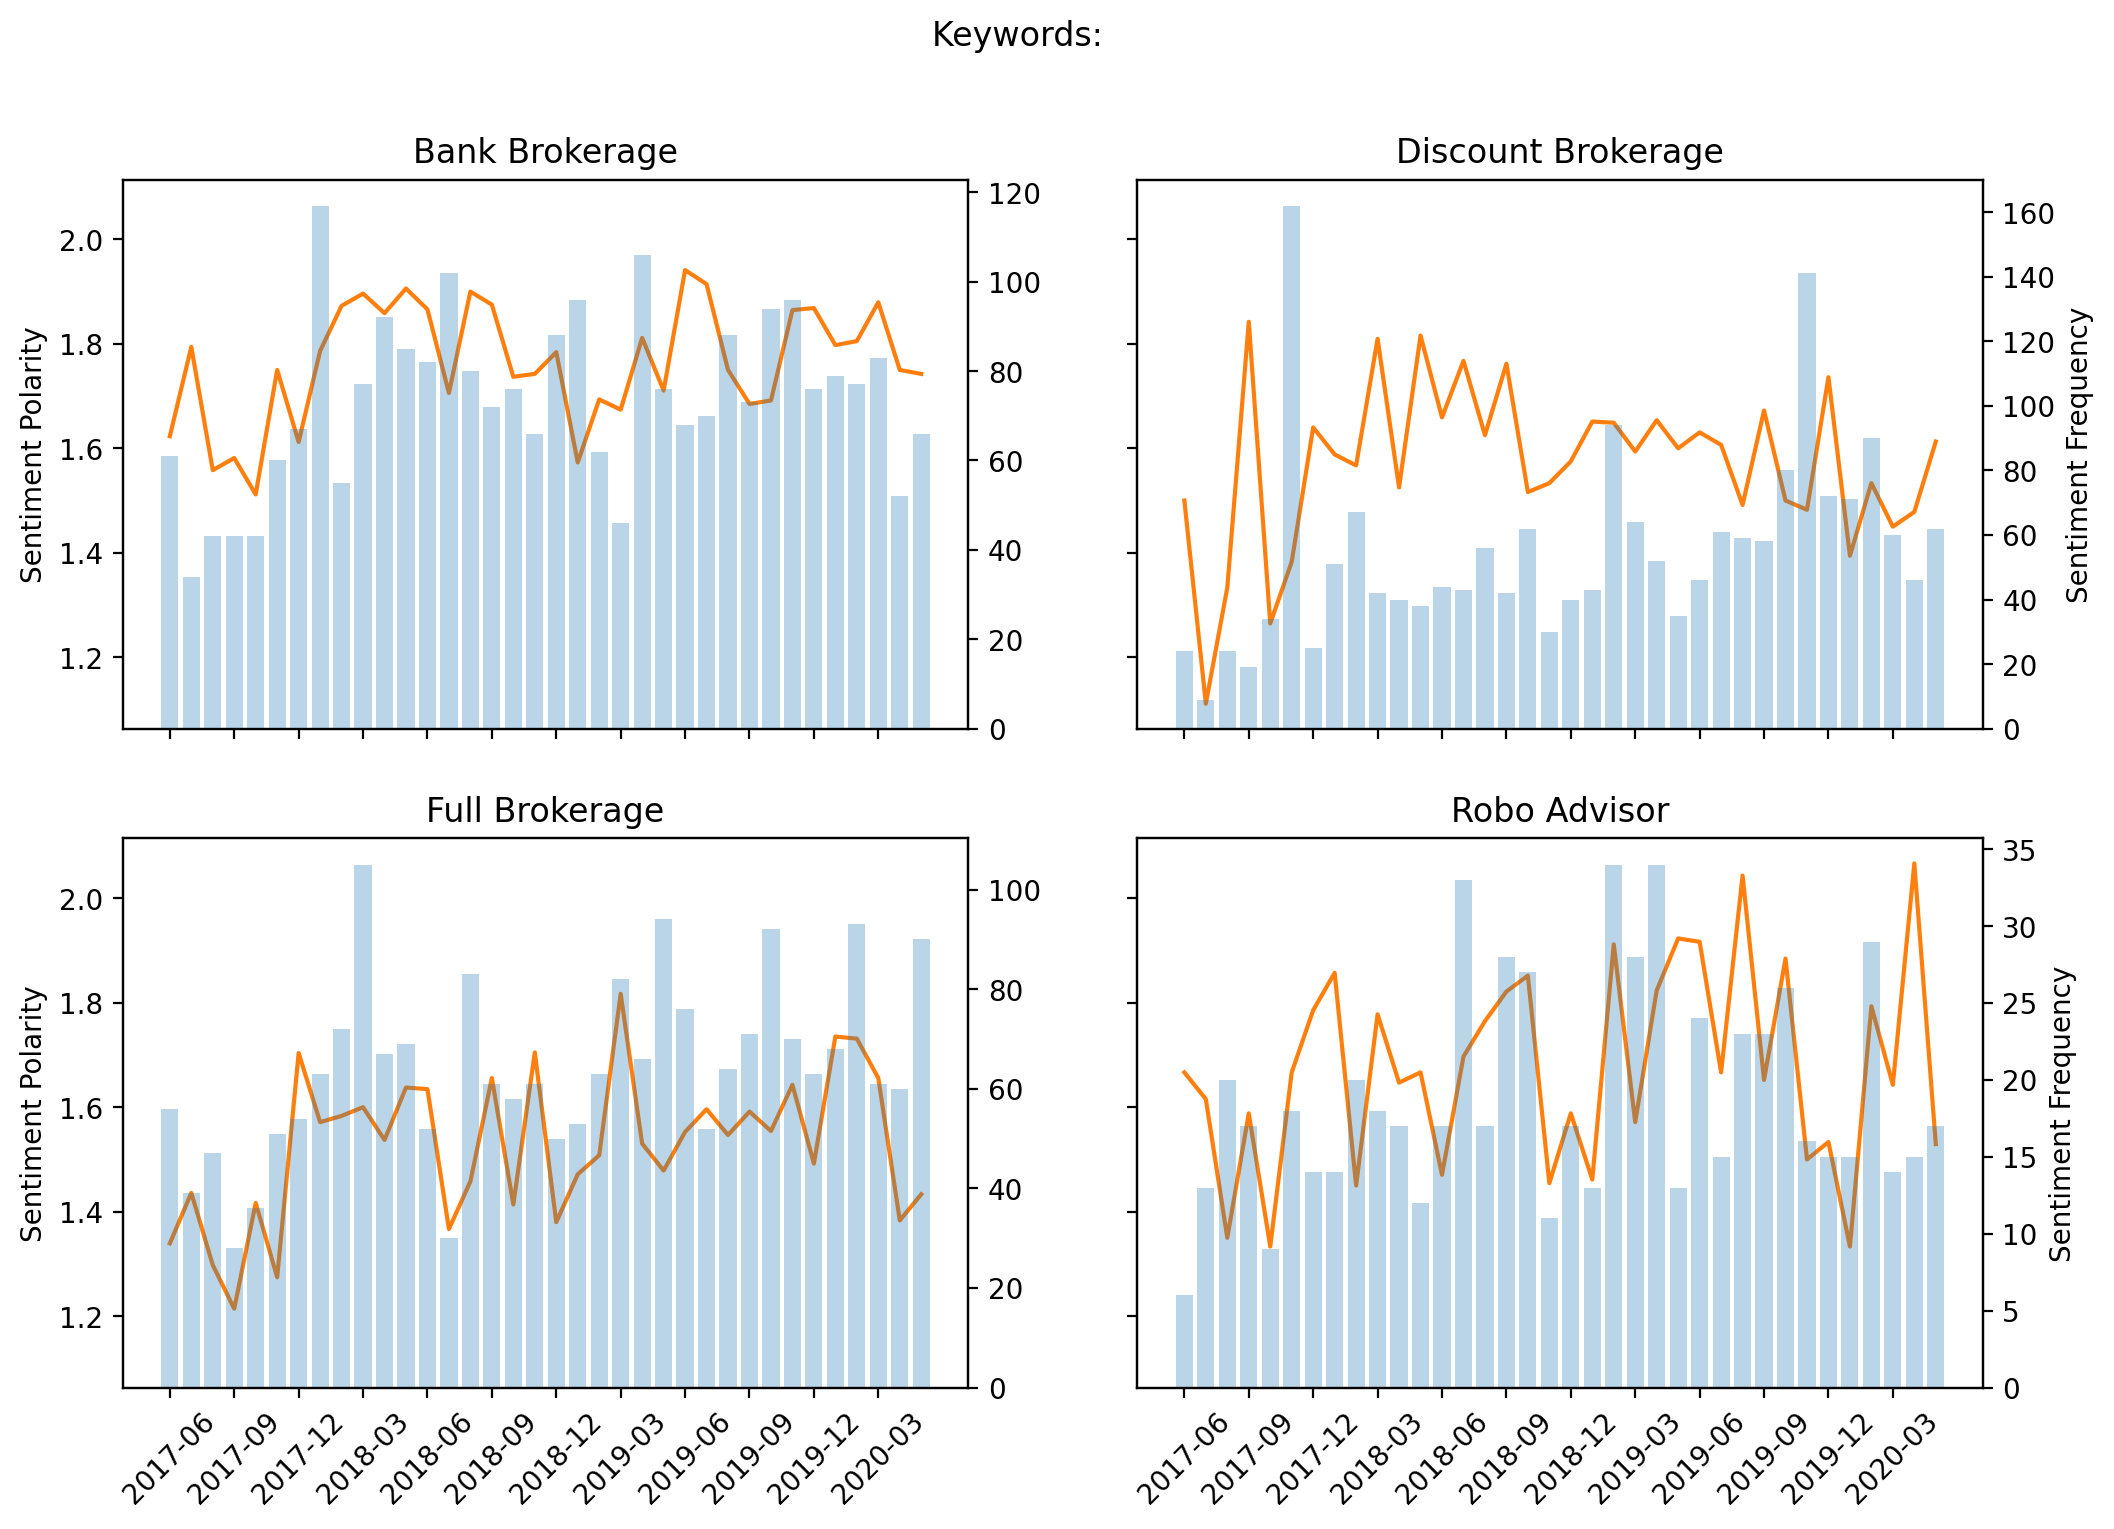

In [35]:
all_trend(metaadvisor,0,[''])

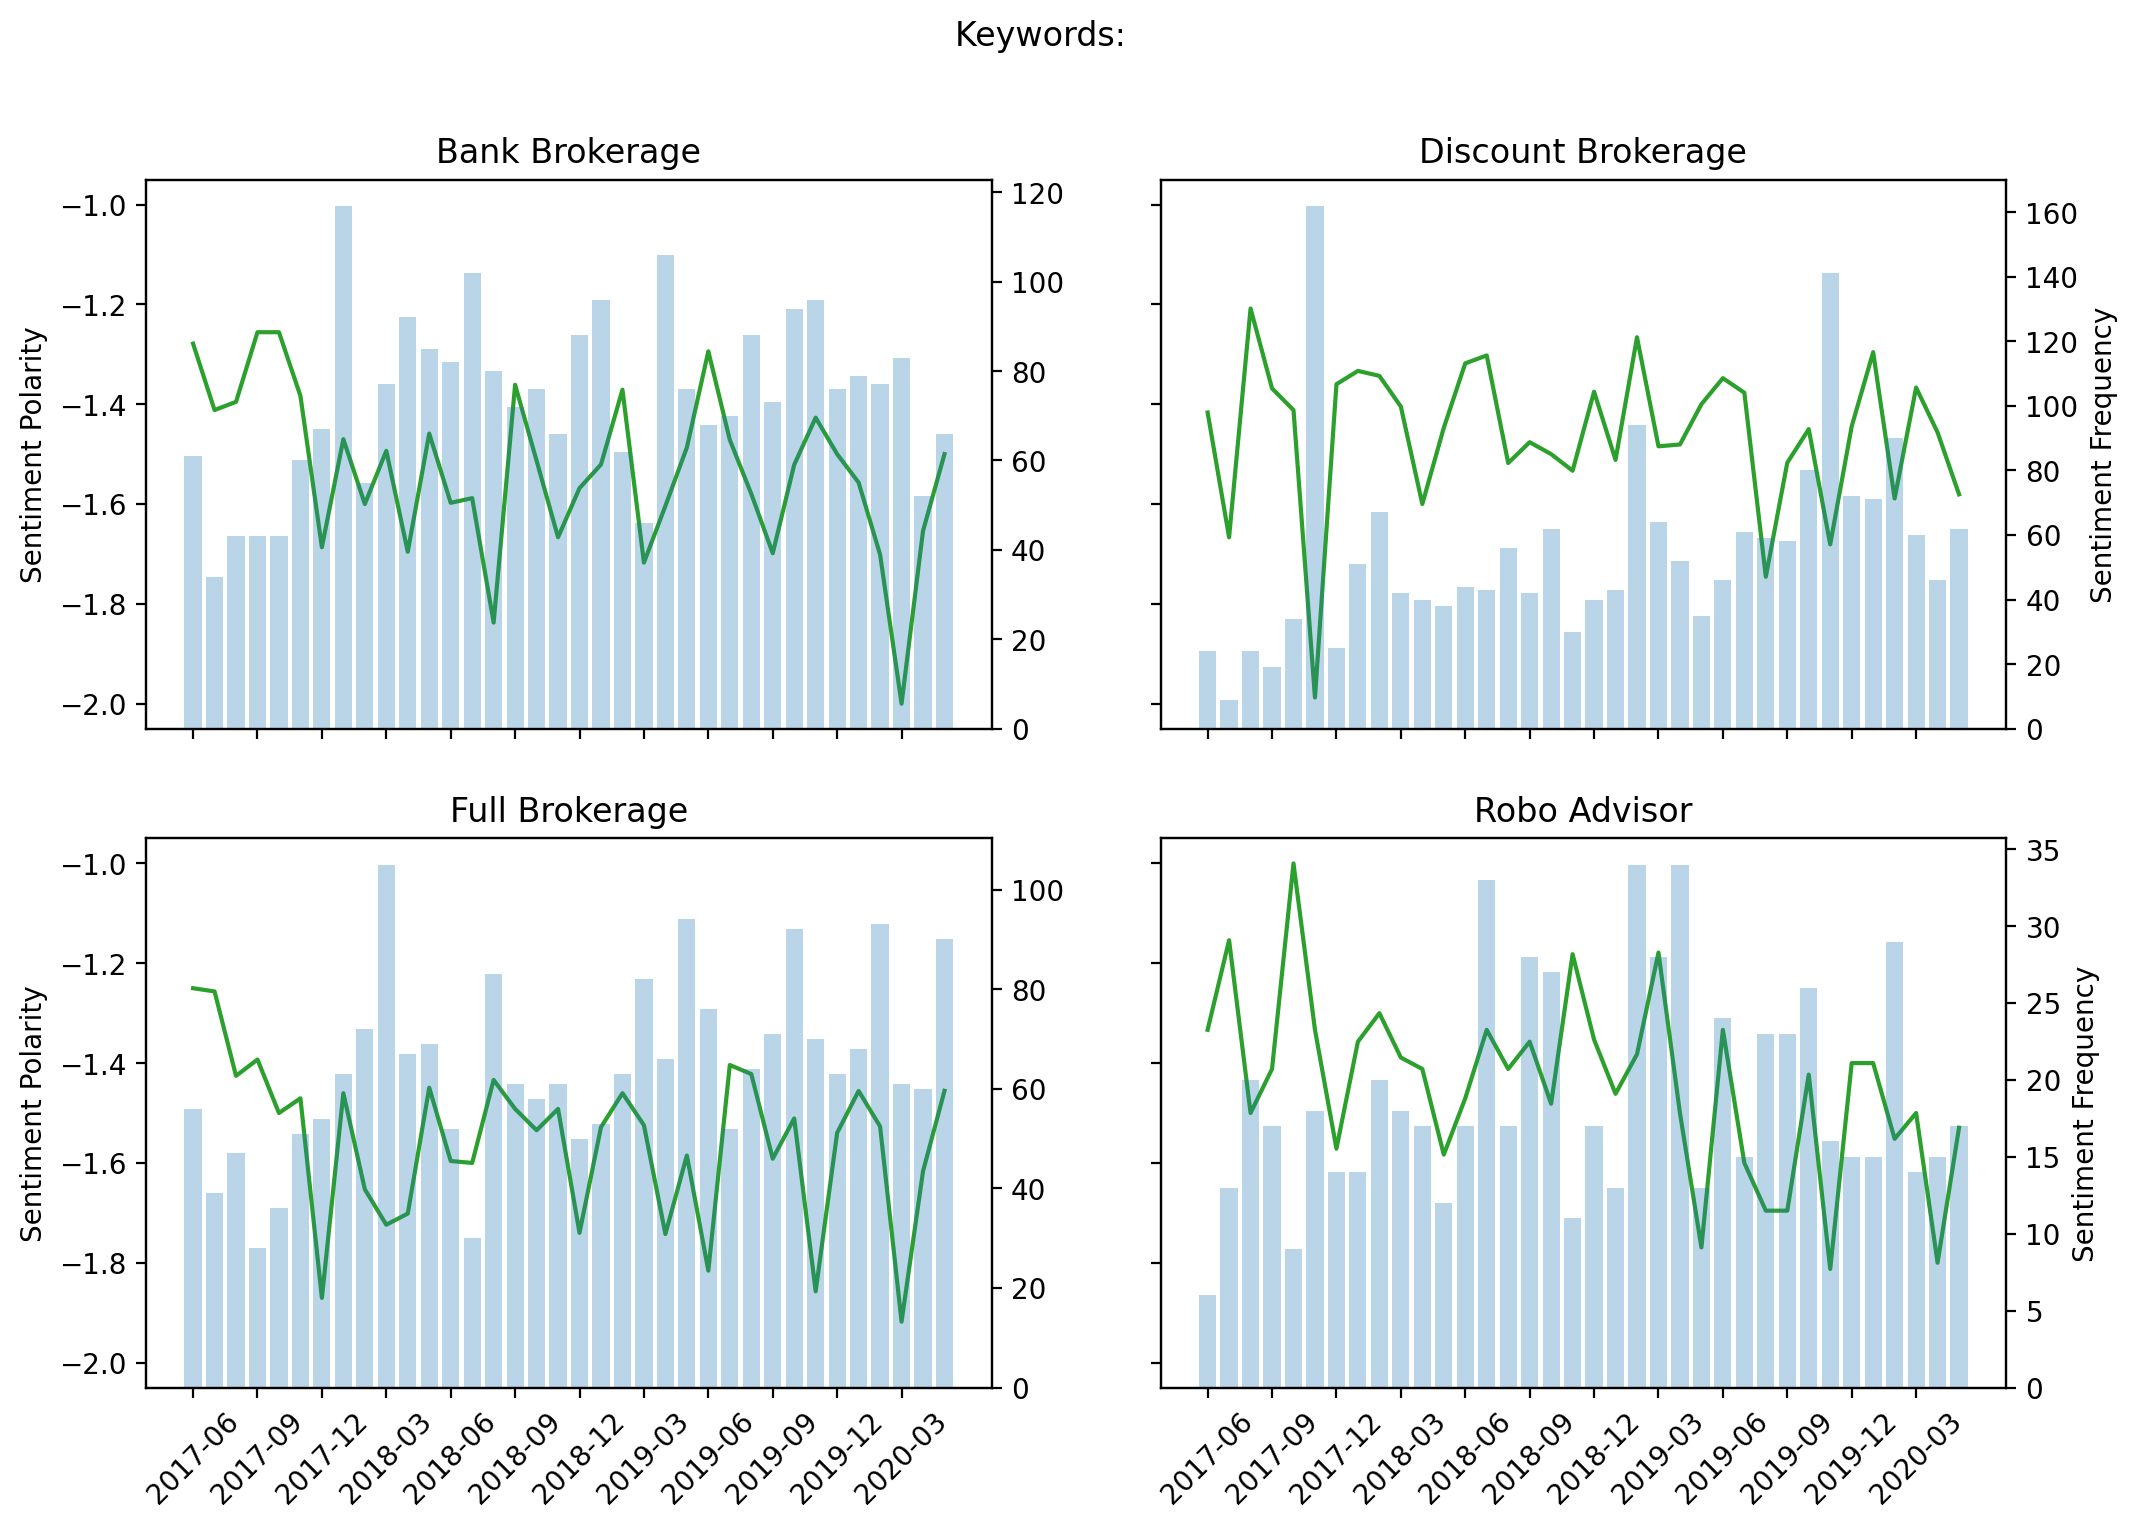

In [36]:
all_trend(metaadvisor,1,[''])

In [69]:
nonsense={'merrill','well','wells','fargo','advisor','financial','boa','jpmorgan','morgan','lynch',
          'wellsfargo','merrilllynch','chase','bankofamerica','bank','america','advisors','stanley',
          'stanleys','ubs','goldman','sachs','morganstanelys'}

In [37]:
def plot(data):
    matplotlib.rcParams['figure.dpi'] = 100
    temp=classify(data)
    plt.plot(temp[0],color='C1')
    plt.plot(temp[1],color='C2')
    plt.show()

In [38]:
def average(metadata):
    app=[subanalyze(i,['']) for i in metadata]
    return [round(np.mean(i[0]),2) for i in app],[round(np.mean(i[1]),2) for i in app]

In [39]:
average(metaadvisor)

([1.76, 1.57, 1.53, 1.68], [-1.53, -1.46, -1.56, -1.44])

In [40]:
pos=np.array([classify(i)[0] for i in metaadvisor])
neg=np.array([classify(i)[1] for i in metaadvisor])
freq=np.array([[len(j) for j in i] for i in metaadvisor])

In [41]:
np.sum(pos*freq,axis=1)/np.sum(freq,axis=1)

array([0.41908714, 0.3081571 , 0.27782609, 0.36217009])

In [42]:
np.sum(neg*freq,axis=1)/np.sum(freq,axis=1)

array([0.22406639, 0.24723061, 0.27782609, 0.19061584])

In [43]:
np.sum(freq,axis=1)

array([2651, 1986, 2300,  682])

In [52]:
print(np.around(pos[0],2))

[0.46 0.47 0.42 0.47 0.4  0.45 0.27 0.44 0.47 0.48 0.46 0.55 0.4  0.37
 0.34 0.58 0.38 0.39 0.36 0.35 0.42 0.24 0.41 0.37 0.59 0.5  0.34 0.34
 0.39 0.48 0.49 0.44 0.38 0.39 0.42 0.39]


In [53]:
print(np.around(pos[2],2))

[0.23 0.31 0.21 0.18 0.19 0.18 0.24 0.25 0.25 0.3  0.22 0.3  0.33 0.23
 0.25 0.39 0.22 0.33 0.22 0.26 0.32 0.41 0.27 0.22 0.25 0.33 0.27 0.35
 0.29 0.26 0.29 0.4  0.35 0.28 0.2  0.21]


In [61]:
print(np.around(pos[1],2))

[0.29 0.   0.25 0.37 0.12 0.19 0.44 0.31 0.33 0.4  0.2  0.39 0.43 0.4
 0.36 0.48 0.29 0.27 0.4  0.37 0.37 0.31 0.4  0.46 0.35 0.34 0.27 0.38
 0.2  0.25 0.38 0.27 0.27 0.25 0.26 0.31]


In [62]:
print(np.around(pos[3],2))

[0.33 0.38 0.25 0.24 0.22 0.39 0.43 0.36 0.25 0.33 0.41 0.25 0.24 0.39
 0.41 0.5  0.41 0.27 0.35 0.23 0.47 0.39 0.38 0.46 0.42 0.2  0.43 0.3
 0.42 0.19 0.4  0.27 0.45 0.36 0.33 0.35]


In [55]:
unique([(i['positive'],i['negative']) for i in lsum(metaadvisor[0][-3:])])

[((2, -1), 59, 29.35),
 ((2, -2), 29, 14.43),
 ((1, -1), 28, 13.93),
 ((1, -2), 28, 13.93),
 ((2, -3), 16, 7.96),
 ((3, -1), 11, 5.47),
 ((2, -4), 9, 4.48),
 ((3, -2), 9, 4.48),
 ((1, -3), 7, 3.48),
 ((1, -4), 2, 1.0),
 ((3, -4), 1, 0.5),
 ((4, -3), 1, 0.5),
 ((4, -1), 1, 0.5)]

In [56]:
unique([(i['positive'],i['negative']) for i in lsum(metaadvisor[2][-3:])])

[((1, -1), 77, 36.49),
 ((1, -2), 36, 17.06),
 ((2, -1), 33, 15.64),
 ((2, -2), 16, 7.58),
 ((2, -3), 12, 5.69),
 ((1, -3), 11, 5.21),
 ((3, -1), 9, 4.27),
 ((3, -2), 6, 2.84),
 ((2, -4), 5, 2.37),
 ((3, -3), 3, 1.42),
 ((1, -4), 3, 1.42)]

In [64]:
text([i for i in lsum(metaadvisor[0][-3:]) if i['positive']==2 and i['negative']==-1])

59


[' Former Merrill Lynch Wealth Advisor Continues Significant of ',
 ' Happy th Birthday to NUMensBball grad Michael Jenkins Today he is a Financial Advisor at Merrill Lynch in Charlotte NC ',
 ' Inventory Best Buy  Retail Sales Consultant ATT  Mobile Lead Best Buy  Relationship Manager Bank of America  Relationship Advisor Silicon Valley Bank',
 ' Server at Four Seasons Hotel  Culinary Test Team for The F Word  English Teacher in Seoul  Front Desk at Davids Bridal  Financial Planner at Merrill Lynch Daynsies SantinaMuha LaurenKnutti RileyWestling DARTHflitcraft',
 ' to have Matthew Marrs Financial Advisor for Merrill Lynch join us for this week Its so nice to have LEAD Alumni come back Thanks for the tips on networking as a young professional Matt ',
 'After all the nightmares lately I demand our MerrillLynch financial advisor pull us out of most of our equities and keep mostly fixed He resisted God bless him for helping us not miss out on the Dows largest oneday gain ever ',
 'After c

In [65]:
LDA([i for i in lsum(metaadvisor[0][-3:]) if i['positive']==2 and i['negative']==-1],10,7,otherwords=nonsense)

['0.014*"advisory" + 0.014*"im" + 0.014*"number" + 0.014*"call" + 0.014*"global" + 0.014*"phone" + 0.014*"mxico"',
 '0.013*"wealth" + 0.013*"manager" + 0.013*"thru" + 0.007*"executive" + 0.007*"secretary" + 0.007*"foundation" + 0.007*"epstein"',
 '0.013*"got" + 0.013*"thanks" + 0.013*"mayor" + 0.013*"gov" + 0.013*"lead" + 0.013*"buy" + 0.013*"relationship"',
 '0.024*"home" + 0.024*"know" + 0.013*"like" + 0.013*"office" + 0.013*"jp" + 0.013*"hr" + 0.013*"work"',
 '0.013*"sponsor" + 0.013*"take" + 0.013*"u" + 0.013*"service" + 0.013*"advisory" + 0.007*"week" + 0.007*"interest"',
 '0.014*"member" + 0.014*"lower" + 0.014*"going" + 0.007*"invest" + 0.007*"thank" + 0.007*"community" + 0.007*"continue"',
 '0.022*"client" + 0.015*"senior" + 0.008*"year" + 0.008*"fund" + 0.008*"program" + 0.008*"partner" + 0.008*"scientific"',
 '0.015*"gate" + 0.015*"bailout" + 0.015*"get" + 0.015*"mine" + 0.015*"got" + 0.008*"good" + 0.008*"giving"',
 '0.020*"today" + 0.013*"happy" + 0.013*"michael" + 0.013*"n

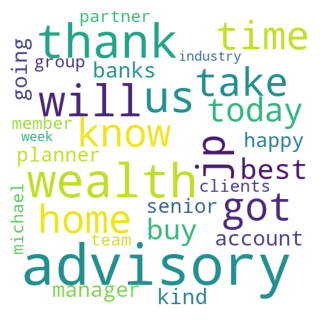

In [70]:
wordcloud([i for i in lsum(metaadvisor[0][-3:]) if i['positive']==2 and i['negative']==-1],otherwords=nonsense)

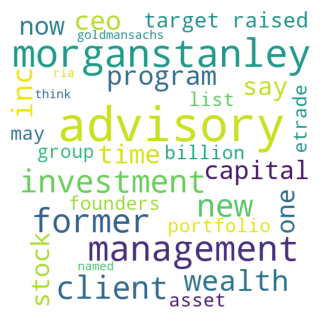

In [71]:
wordcloud([i for i in lsum(metaadvisor[2][-3:]) if i['positive']==1 and i['negative']==-1],otherwords=nonsense)

In [44]:
unique([(i['positive'],i['negative']) for i in lsum(metaadvisor[0])])

[((2, -1), 799, 30.14),
 ((1, -1), 519, 19.58),
 ((2, -2), 409, 15.43),
 ((1, -2), 337, 12.71),
 ((3, -1), 222, 8.37),
 ((2, -3), 113, 4.26),
 ((1, -3), 81, 3.06),
 ((3, -2), 66, 2.49),
 ((2, -4), 43, 1.62),
 ((4, -1), 17, 0.64),
 ((1, -4), 16, 0.6),
 ((3, -3), 12, 0.45),
 ((4, -2), 7, 0.26),
 ((3, -4), 4, 0.15),
 ((1, -5), 2, 0.08),
 ((2, -5), 2, 0.08),
 ((4, -4), 1, 0.04),
 ((4, -3), 1, 0.04)]

In [45]:
unique([(i['positive'],i['negative']) for i in lsum(metaadvisor[2])])

[((1, -1), 820, 35.65),
 ((2, -1), 380, 16.52),
 ((1, -2), 374, 16.26),
 ((2, -2), 176, 7.65),
 ((3, -1), 163, 7.09),
 ((1, -3), 119, 5.17),
 ((3, -2), 69, 3.0),
 ((2, -3), 66, 2.87),
 ((1, -4), 44, 1.91),
 ((2, -4), 32, 1.39),
 ((4, -1), 21, 0.91),
 ((3, -3), 17, 0.74),
 ((3, -4), 7, 0.3),
 ((4, -2), 6, 0.26),
 ((1, -5), 4, 0.17),
 ((4, -3), 2, 0.09)]

In [46]:
text([i for i in lsum(metaadvisor[0]) if i['positive']==2 and i['negative']==-1])

799


['  Whitmans Bakerycashiergopher  Waterwheel Realtyphones copywriter  TCBYteam member  Ranch hand  Flopped college startup  Newmarket Town CouncilUKassist Town Clerk  Merrill LynchFinancial Advisor  Respire PresidentOwner',
 '  realDonaldTrump Advisor CARTER PAGE leaves the Pentagon for MerrillLynch befriends ProRussia Oligarch Trump Donor  Page MOVES to Russia Works with PUTINS Top Brass for  YEARS ',
 ' Advisory Committee members Laura Benedict SelfHelpCU Rick Larson NCIFund Sharlene Brown of PRFI Henry McKoy NCGrowth Chris Parker of Whiddon Parker Grp MerrillLynch Alison Yonas of LCCU Mary Ellen Zellerbach of Martin Investments ',
 ' AdvisoryBoard Members Check your directory to see whats lurking in your community AND how many roles that Wells AdvisoryMember plays in your Local Government felonious WestlakeVillageCA POTUS',
 ' Big BirdsSixers fan Happen to work for Merrill Lynch Would you take a meeting for another advisor',
 ' Big firms such as UBS Raymond James and Bank of America

In [47]:
LDA([i for i in lsum(metaadvisor[0]) if i['positive']==2 and i['negative']==-1],20,15,nonsense)

['0.011*"thanks" + 0.010*"want" + 0.009*"sponsor" + 0.009*"time" + 0.009*"learn" + 0.008*"best" + 0.007*"investment" + 0.007*"manager" + 0.006*"career" + 0.005*"back" + 0.005*"thank" + 0.005*"week" + 0.005*"dont" + 0.005*"valley" + 0.004*"woman"',
 '0.008*"new" + 0.005*"join" + 0.005*"plan" + 0.005*"council" + 0.005*"advisory" + 0.005*"wealth" + 0.004*"client" + 0.004*"proud" + 0.004*"industry" + 0.004*"psa" + 0.004*"year" + 0.004*"register" + 0.004*"career" + 0.004*"pay" + 0.004*"several"',
 '0.007*"deal" + 0.007*"nasdaq" + 0.007*"analysis" + 0.006*"want" + 0.005*"program" + 0.005*"could" + 0.005*"year" + 0.005*"thanks" + 0.005*"virtual" + 0.005*"cost" + 0.005*"advisory" + 0.005*"session" + 0.005*"capital" + 0.005*"become" + 0.005*"top"',
 '0.016*"thank" + 0.011*"advisory" + 0.007*"year" + 0.007*"group" + 0.007*"including" + 0.007*"support" + 0.005*"former" + 0.005*"today" + 0.005*"work" + 0.005*"know" + 0.005*"dont" + 0.005*"thanks" + 0.005*"generous" + 0.005*"sachs" + 0.005*"goldman

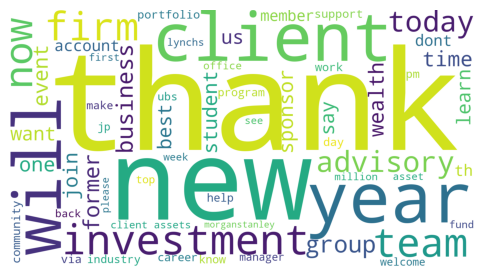

In [48]:
wordcloud([i for i in lsum(metaadvisor[0]) if i['positive']==2 and i['negative']==-1],60,nonsense,1800,1000)

# another

In [ ]:
# potential insight
# merrill lynch woman

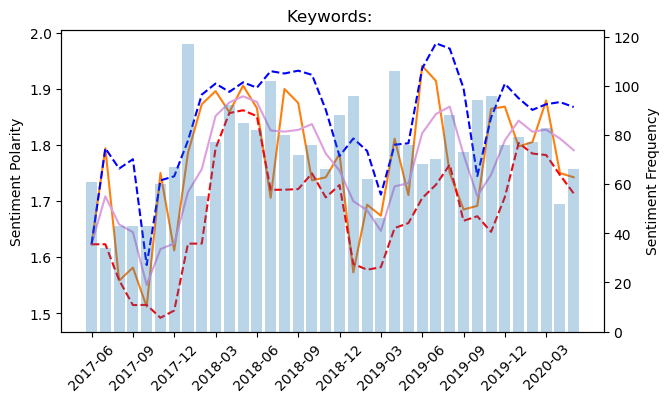

In [77]:
ma(metaadvisor[0],[''],ma=3)

In [85]:
unique([(i['positive'],i['negative']) for i in lsum(metaadvisor[0][3:6])])

[((2, -1), 54, 36.99),
 ((1, -1), 49, 33.56),
 ((2, -2), 14, 9.59),
 ((1, -2), 10, 6.85),
 ((3, -1), 8, 5.48),
 ((2, -3), 4, 2.74),
 ((1, -3), 4, 2.74),
 ((3, -2), 2, 1.37),
 ((1, -4), 1, 0.68)]

In [86]:
unique([(i['positive'],i['negative']) for i in lsum(metaadvisor[0][9:12])])

[((2, -1), 91, 35.83),
 ((2, -2), 41, 16.14),
 ((1, -2), 32, 12.6),
 ((1, -1), 29, 11.42),
 ((3, -1), 24, 9.45),
 ((2, -3), 13, 5.12),
 ((3, -2), 10, 3.94),
 ((1, -3), 5, 1.97),
 ((2, -4), 5, 1.97),
 ((3, -3), 2, 0.79),
 ((1, -4), 1, 0.39),
 ((4, -1), 1, 0.39)]

In [90]:
text([i for i in lsum(metaadvisor[0][9:12]) if i['positive']==3 or (i['negative']<=-2 and i['positive']==2)])

95


['  Distinguished Young Alumni award winner James Wolf He is a vice president senior financial advisor senior portfolio advisor and retirement accredited financial advisor at Merrill Lynch How did the impact him ',
 '  universities  employers  advisors Great to welcome so many organisations to our Careers and Universities Fair today Airbus jpmorgan RoyalAirForce UniofBat cardiffuni KingsCollegeLon univofstandrews unisouthampton ',
 ' Biggest YCombinator Exits CruiseAuto General Motors Twitch Amazon WePay JP Morgan CoreOS Red Hat heroku Salesforce OMGPOP Zynga FutureAdvisor BlackRock automatic Sirius XM disqus Zeta Global ParseIt Facebook ',
 ' Wed like to thank USOWomen NationBuilder Facebook WellsFargo Advisors for making our Summit our Training an amazing experience thus far Amazing last couple of days ',
 ' a financial advisor trained in product pushing by MerrillLynch is being sentenced to up to  years in prison today at its finest How many more like him are there Tens of thousands

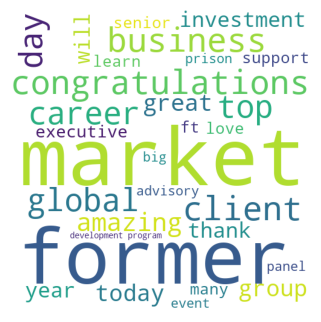

In [94]:
wordcloud([i for i in lsum(metaadvisor[0][9:12]) if i['positive']==3 or (i['negative']<=-2 and i['positive']==2)],otherwords=nonsense)

In [98]:
LDA([i for i in lsum(metaadvisor[0][3:6]) if i['positive']==3 or (i['negative']<=-2 and i['positive']==2)],10,7,nonsense)

['0.064*"fraud" + 0.043*"charged" + 0.043*"security" + 0.043*"former" + 0.023*"let" + 0.023*"pathetic" + 0.023*"charge"',
 '0.016*"president" + 0.016*"vice" + 0.016*"senior" + 0.016*"first" + 0.016*"sean" + 0.016*"seangaffey" + 0.016*"one"',
 '0.026*"market" + 0.026*"encounter" + 0.026*"career" + 0.026*"caring" + 0.026*"decision" + 0.026*"story" + 0.026*"inspires"',
 '0.025*"broker" + 0.025*"advisorhubinc" + 0.025*"hollywood" + 0.025*"north" + 0.013*"jedhorowitz" + 0.013*"masonbraswell" + 0.013*"leading"',
 '0.023*"follow" + 0.023*"wirehouse" + 0.023*"moving" + 0.023*"take" + 0.023*"issue" + 0.023*"rival" + 0.023*"environment"',
 '0.016*"team" + 0.016*"currently" + 0.016*"computer" + 0.016*"founder" + 0.016*"ethereum" + 0.016*"cap" + 0.016*"harvard"',
 '0.033*"ml" + 0.017*"join" + 0.017*"hill" + 0.017*"discussion" + 0.017*"innovation" + 0.017*"partnership" + 0.017*"excited"',
 '0.026*"growth" + 0.026*"first" + 0.026*"day" + 0.013*"capital" + 0.013*"new" + 0.013*"lynchs" + 0.013*"barron

In [93]:
LDA([i for i in lsum(metaadvisor[0][9:12]) if i['positive']==3 or (i['negative']<=-2 and i['positive']==2)],10,7,nonsense)

['0.014*"job" + 0.014*"chicagobooth" + 0.010*"top" + 0.010*"day" + 0.007*"global" + 0.007*"event" + 0.007*"education"',
 '0.017*"making" + 0.013*"big" + 0.013*"investment" + 0.013*"tell" + 0.013*"prohibit" + 0.013*"recommendation" + 0.013*"cryptocurrency"',
 '0.022*"group" + 0.018*"jpm" + 0.017*"value" + 0.017*"rose" + 0.013*"stake" + 0.013*"holding" + 0.013*"share"',
 '0.019*"former" + 0.016*"business" + 0.012*"brand" + 0.012*"vice" + 0.008*"client" + 0.008*"career" + 0.008*"senior"',
 '0.008*"client" + 0.008*"pay" + 0.008*"like" + 0.008*"banking" + 0.008*"kid" + 0.008*"patient" + 0.008*"find"',
 '0.015*"vice" + 0.015*"president" + 0.008*"advisory" + 0.008*"james" + 0.008*"janney" + 0.008*"jacob" + 0.008*"speaker"',
 '0.023*"amazing" + 0.018*"thank" + 0.014*"like" + 0.014*"far" + 0.014*"wed" + 0.014*"facebook" + 0.009*"congratulation"',
 '0.020*"program" + 0.020*"taber" + 0.020*"year" + 0.015*"many" + 0.010*"congratulation" + 0.010*"development" + 0.010*"executive"',
 '0.010*"career" 

In [130]:
text(search([i for i in lsum(metaadvisor[0][9:12]) if i['positive']==3 or (i['negative']<=-2 and i['positive']==2)],
            ['program']))

6


['Congratulations to Taber Bohlender Taber was one of  recipients of an internship with Bank of America Merrill Lynch Executive Mgt Summer Training Program where she will be working as an Analyst in the advisor development program ',
 'Congratulations to Taber Bohlender Taber was one of  recipients of an internship with Bank of America Merrill Lynch Executive Mgt Summer Training Program where she will be working as an Analyst in the advisor development program ',
 'Im now working for Merrill Lynch in the Financial Advisor Development Program Amazing first month so far',
 'Read the WSJ article about your Account Executives Financial Advisors or whatever term you are using to describe them now Youre no better than Merrill Lynch Morgan Stanley UBS Wells Fargo fraudsters with your conflicted incentivization programs',
 'We are excited to announce our Merrill Lynch Financial Advisor Womens webinar on March  Join women from all backgrounds to learn how our development program can support you

In [132]:
unique([(i['positive'],i['negative']) for i in lsum(metaadvisor[0][9:12])])

[((2, -1), 91, 35.83),
 ((2, -2), 41, 16.14),
 ((1, -2), 32, 12.6),
 ((1, -1), 29, 11.42),
 ((3, -1), 24, 9.45),
 ((2, -3), 13, 5.12),
 ((3, -2), 10, 3.94),
 ((1, -3), 5, 1.97),
 ((2, -4), 5, 1.97),
 ((3, -3), 2, 0.79),
 ((1, -4), 1, 0.39),
 ((4, -1), 1, 0.39)]

In [131]:
unique([(i['positive'],i['negative']) for i in lsum(metaadvisor[0][20:22])])

[((1, -1), 32, 29.63),
 ((2, -1), 25, 23.15),
 ((2, -2), 17, 15.74),
 ((1, -2), 12, 11.11),
 ((3, -1), 9, 8.33),
 ((2, -3), 5, 4.63),
 ((3, -2), 3, 2.78),
 ((2, -4), 2, 1.85),
 ((1, -3), 2, 1.85),
 ((2, -5), 1, 0.93)]

In [138]:
text(search([i for i in lsum(metaadvisor[0][9:12]) if i['positive']==2 and i['negative']==-1],
            ['']))

91


['  Whitmans Bakerycashiergopher  Waterwheel Realtyphones copywriter  TCBYteam member  Ranch hand  Flopped college startup  Newmarket Town CouncilUKassist Town Clerk  Merrill LynchFinancial Advisor  Respire PresidentOwner',
 ' Celebrating his st birthday today is IlliniBaseball alum Dominic Altobelli domaltobelli is now Senior VP Advisor at Merrill Lynch in Chicagoland ',
 ' Merrill Lynch Brings in More Advisors Record Revenue For Bank of America ',
 ' Sam Snider MerrillLynch Financial Advisor and is sharing tips on saving and investing Its FREE and ALL students are welcomed to join April   PM  Bidgood Hall ',
 ' days til Villabration Special thanks to Event Sponsors Merrill Lynch Advisors and Home City ',
 ' helped FryEgg find advisors from top Fortune  companies like Oracle Puma Merrill Lynch and th Century Fox ',
 'A Since  WellsFargo Advisors has helped make the dream of attending college a reality for many local youth Through their Focus on College program theyve helped families s

In [139]:
text(search([i for i in lsum(metaadvisor[0][20:22]) if i['positive']==2 and i['negative']==-1],
            ['']))

25


['A BIG Thank You to Sigma Pi at Missouri State Chapter and AlumniInstitute for Development of Ethics and Leadership and WellsFargo Advisors CoPresenting Sponsors of Saturdays Kansas City MarooNation Ball ',
 'Are you interested in launching a career as a Financial Advisor In this interactive webcast our team will Share a dayinthelife view into the role of a Financial Advisor Show you the extensive opportunities available with Merrill Lynch Register through Handshake today ',
 'As of  Top  Owners of Deutsche BlackRock Fund Advisors Hudson Executive Capital The Vanguard Group Inc Merrill Lynch International Goldman Sachs International DWS Investment GmbH Norges Bank Investment Management Deka Investment GmbH UBS Securities LLC COMMERZBANK',
 'Good news for advisors currently with Wells Fargo FiNet andor Private Client Group New easy option for those who want to start their own RIA ',
 'Got a Birthday email from my Loan Advisor at Wells Fargo Unless youre telling me my loans have been fo